In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def step_signal (low, high, s_low=0.2, s_high=0.2, larg_high_i=20, larg_high_f=100, larg_low_i=20, larg_low_f=100, prob_positivo=0.5, n=100):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal

In [103]:
def alarm_generate(x, list=var_list):
    '''alarm_generate is a function when return a vector '''
    t_delay = 0
    t_dead = 0
    log_alarm = np.arange(len(x))
  
    if var_list["type_var"] == 'high':
        for i in np.arange(len(x)):
            if x[i] > var_list["limit"]:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0
    else:
        for i in np.arange(len(x)):
            if x[i] < limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0

    return log_alarm

In [104]:
x = []
for i in np.arange(10):
    x.append(step_signal(3,7))

In [105]:
for i in np.arange(10):
    if len(x[0]) > len(x[i]):
        if x[i][-1] >= 2.8 and x[i][-1] <= 3.2:
            x[i] = np.concatenate((x[i],np.random.uniform(3-0.2,3+0.2,len(x[0])-len(x[i]))))
        elif x[i][-1] >= 6.7 and x[i][-1] <= 7.3:
            x[i] = np.concatenate((x[i],np.random.uniform(7-0.3,7+0.3,len(x[0])-len(x[i]))))
    else:
        delete = np.nonzero(x[i][len(x[0]):])
        x[i] = np.delete(x[i],delete)
    
    
# limit = 5 
# type_ = 'high' 
# delay_time = 100*3/len(x[0])
# dead_band = 70*3/len(x[0])
# t_delay = 0
df = pd.DataFrame()
for i in np.arange(10):
    df['x'+str(i)] = x[i]

tout = np.arange(0,3,3/len(x[0]),dtype=float)    
df.insert(0,'tout',tout)

In [106]:
df.head()

,tout,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.000000,3.160934,2.800485,2.800343,6.912177,3.060794,6.962150,6.983160,3.140506,3.147521,6.803150
1,0.000488,2.821664,3.170227,2.870109,7.013093,3.101221,7.089710,6.866949,2.817394,3.189724,6.811568
2,0.000977,2.826467,2.858321,2.883551,7.038244,2.877029,6.819824,6.914463,3.110855,3.126393,6.821092
3,0.001465,3.061640,3.020801,3.085746,6.947471,3.019671,6.967323,7.142251,2.944566,2.840379,6.903848
4,0.001953,2.965002,2.929185,3.136693,7.176624,2.993145,6.985263,7.109382,2.917437,3.184172,7.092167


In [108]:
var_list = {
    "limit": 5,
    "type_var":'high', 
    "delay_time" : 100*3/len(x[0]), 
    "dead_band_delay" : 70*3/len(x[0])
}

log = []
for i in np.arange(10):
    log.append(alarm_generate(x[i], var_list))

In [109]:
df_log = pd.DataFrame()
for i in np.arange(10):
    df_log['Var_'+str(i)] = log[i]

In [110]:
df_log.head()

,Var_0,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


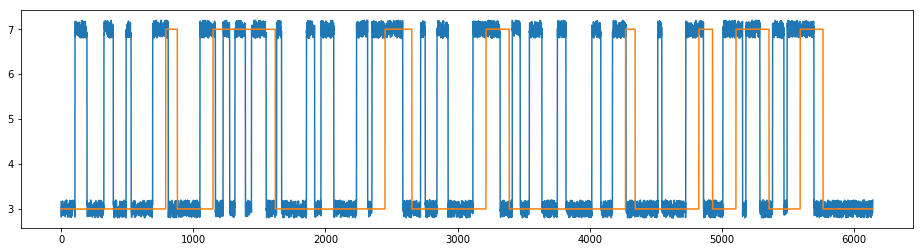

In [111]:
plt.figure(figsize=(16,4))
plt.plot(df['x0'])
plt.plot(df_log['Var_0']*4+3)


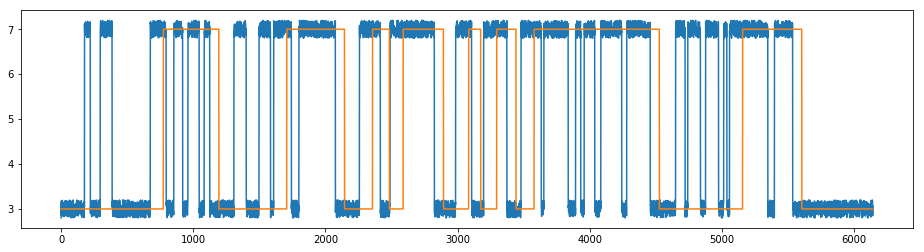

In [112]:
plt.figure(figsize=(16,4))
plt.plot(df['x1'])
plt.plot(df_log['Var_1']*4+3)